In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import svm


In [36]:
df = pd.read_csv("/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv")


/tmp/ipykernel_34/790702103.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [37]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.40
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.60
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.20
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.80


# Dataframe dimensions

In [38]:
print(f'{df.shape[1]} columns and {df.shape[0]} rows.')

8 columns and 2906327 rows.


# Missing values per column

In [39]:
pd.DataFrame({'Null values': df.isnull().sum(), 'Percentage (%)': round((df.isnull().sum()/df.shape[0]) * 100, 2)}).transpose()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Null values,0.00,0.00,1450990.00,0.00,0.00,0.00,0.00,0.00
Percentage (%),0.00,0.00,49.93,0.00,0.00,0.00,0.00,0.00


# Dataframe descriptive statistics

In [40]:
pd.options.display.float_format = '{:.2f}'.format # to avoid scientific notation
df.describe()

,Month,Day,Year,AvgTemperature
count,2906327.00,2906327.00,2906327.00,2906327.00
mean,6.47,15.72,2006.62,56.00
std,3.46,8.80,23.38,32.12
min,1.00,0.00,200.00,-99.00
25%,3.00,8.00,2001.00,45.80
50%,6.00,16.00,2007.00,62.50
75%,9.00,23.00,2013.00,75.50
max,12.00,31.00,2020.00,110.00


Here you can see some points to analyze more closely:

The minimum of the column day is ZERO, certainly incorrectly entered data, which configures an inconsistency.

And the minimum of the average temperature column, after all -99 °F corresponds to approximately - 73 °C. Despite being a possible temperature value for very cold areas of the planet, it is important to analyze the data with this value.

In the column year, the smallest value that appears is 200.

# Column renaming

In [41]:
df = df.rename(
    columns= {'Region': 'region', 'Country': 'country', 'State': 'state', 'City': 'city',
              'Month': 'month', 'Day': 'day', 'Year': 'year', 'AvgTemperature': 'avg_temperature'}
)

In [42]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

# Removal of inconsistent data

In [43]:
day_zero = df.query('day == 0')
day_zero

,region,country,state,city,month,day,year,avg_temperature
82774,Africa,Guinea,NaN,Conakry,3,0,2008,-99.00
85697,Africa,Guinea,NaN,Conakry,3,0,2016,-99.00
92041,Africa,Guinea-Bissau,NaN,Bissau,3,0,2008,-99.00
146077,Africa,Malawi,NaN,Lilongwe,3,0,2012,-99.00
177862,Africa,Nigeria,NaN,Lagos,3,0,2008,-99.00
241159,Africa,Uganda,NaN,Kampala,3,0,2012,-99.00
1209901,North America,Mexico,NaN,Guadalajara,3,0,2012,-99.00
1333910,South/Central America & Carribean,Cuba,NaN,Havana,3,0,2008,-99.00


In [44]:
year_inconsistent = df.query('year < 1995').sample(10)
year_inconsistent

,region,country,state,city,month,day,year,avg_temperature
753400,Europe,Germany,NaN,Munich,12,27,201,-99.00
743375,Europe,Germany,NaN,Hamburg,12,11,200,-99.00
754485,Europe,Germany,NaN,Munich,12,14,201,-99.00
58206,Africa,Ethiopia,NaN,Addis Ababa,12,31,201,-99.00
743383,Europe,Germany,NaN,Hamburg,12,19,200,-99.00
754489,Europe,Germany,NaN,Munich,12,18,201,-99.00
111986,Africa,Kenya,NaN,Nairobi,12,13,201,-99.00
743783,Europe,Germany,NaN,Hamburg,12,24,200,-99.00
744936,Europe,Germany,NaN,Hamburg,12,22,201,-99.00
744930,Europe,Germany,NaN,Hamburg,12,16,201,-99.00


In [45]:
df.query('avg_temperature == -99')


,region,country,state,city,month,day,year,avg_temperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.00
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.00
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.00
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.00
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.00
...,...,...,...,...,...,...,...,...
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.00
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.00
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.00
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.00


In [46]:
df = df.drop(df.query('avg_temperature == -99').index).reset_index(drop= True) # adjust index after dropping the data
df

,region,country,state,city,month,day,year,avg_temperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.20
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.40
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.80
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.40
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.90
...,...,...,...,...,...,...,...,...
2826650,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.40
2826651,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.60
2826652,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.20
2826653,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.80


# Drop of state column

In [47]:
df = df.drop('state', axis= 1)

Data went from 2906327 rows × 8 columns to 2826655 rows × 7 columns

# Temperature unit conversion

In [48]:
df['avg_temperature'] = df['avg_temperature'].map(lambda x: (x - 32) * (5/9))
df.sample(10)

,region,country,city,month,day,year,avg_temperature
2652517,North America,US,San Angelo,10,5,2015,22.78
161451,Africa,Senegal,Dakar,6,25,2002,27.00
155776,Africa,Nigeria,Lagos,6,21,2011,26.44
1398765,North America,US,Mobile,6,8,2006,27.22
1756702,North America,US,Chicago,12,28,1997,-4.39
1894685,North America,US,Paducah,4,9,1996,4.17
2024240,North America,US,Duluth,8,19,2006,18.11
147175,Africa,Nigeria,Niamey,2,2,2005,29.00
1984908,North America,US,Flint,10,20,1999,7.22
2818309,North America,US,Cheyenne,3,9,2014,8.00


# Derivate columns from date columns

In [49]:
# df['date'] = pd.to_datetime(df[['day', 'month', 'year']], format = '%Y-%m-%d')
# df['quarter_of_year'] = df['year'].astype(str) + 'Q' + df['date'].dt.quarter.astype(str)
# df['century'] = df['year'].map(lambda x: 'XX' if x <= 2000 else 'XXI')
# df.sample(5)

In [50]:
# df = df.drop(['day', 'month'], axis= 1)

# Exploratory analysis

In [51]:
pd.DataFrame({'Mean': df['avg_temperature'].mean(),
              'Median': df['avg_temperature'].median(),
              'Mode': df['avg_temperature'].mode()[0],
              'Standard deviation': df['avg_temperature'].std()},
             index= ['Values'])

,Mean,Median,Mode,Standard deviation
Values,15.76,17.39,26.78,10.61


#  Histogram

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



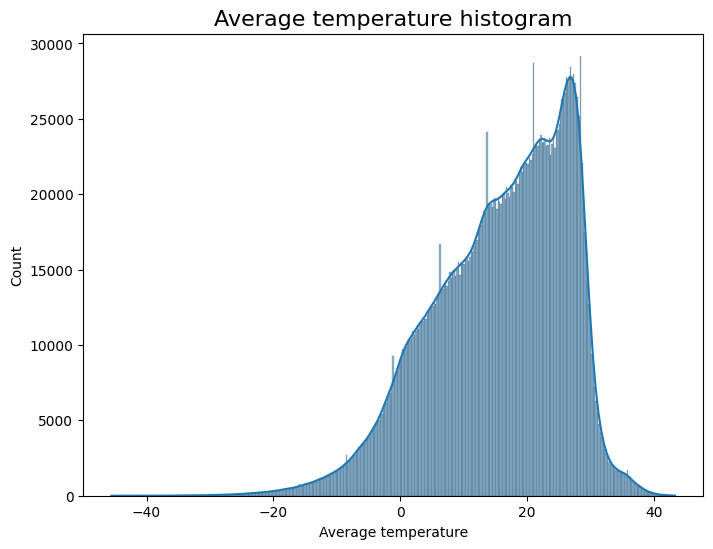

In [52]:
plt.figure(figsize= (8, 6))
ax = sns.histplot(data= df, x= 'avg_temperature', kde= True)
ax.set_title('Average temperature histogram', fontsize= 16)
ax.set_xlabel('Average temperature')
plt.show()

# Mean, median and standard deviation by region

In [53]:
df.groupby('region')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
region,,,
Africa,23.56,24.89,5.15
Asia,20.06,24.22,10.96
Australia/South Pacific,16.84,16.72,5.40
Europe,11.08,11.44,8.44
Middle East,23.24,23.67,9.33
North America,13.42,14.72,10.73
South/Central America & Carribean,22.33,23.78,5.99


# Histograms of average temperature by region

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

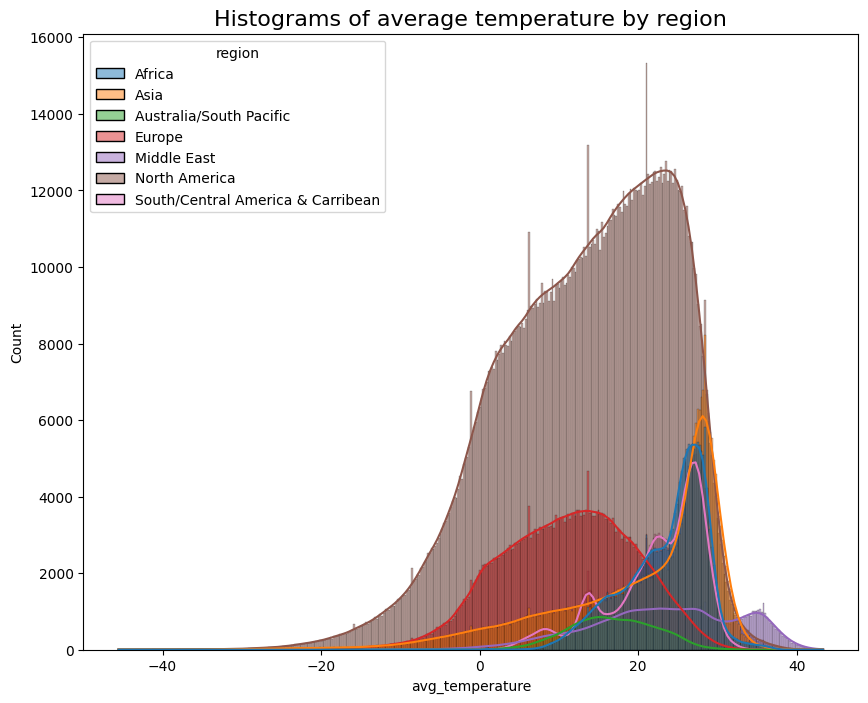

In [54]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'avg_temperature', hue= 'region', kde= True)
ax.set_title('Histograms of average temperature by region', fontsize= 16)
plt.show()

# Data distribution in region column

In [55]:
pd.DataFrame({'Count': df.value_counts('region'),
              'Percentage (%)': round(df.value_counts('region', normalize= True) * 100, 2)})

,Count,Percentage (%)
region,,
North America,1548160,54.77
Europe,368702,13.04
Asia,306163,10.83
Africa,220919,7.82
South/Central America & Carribean,206691,7.31
Middle East,120811,4.27
Australia/South Pacific,55209,1.95


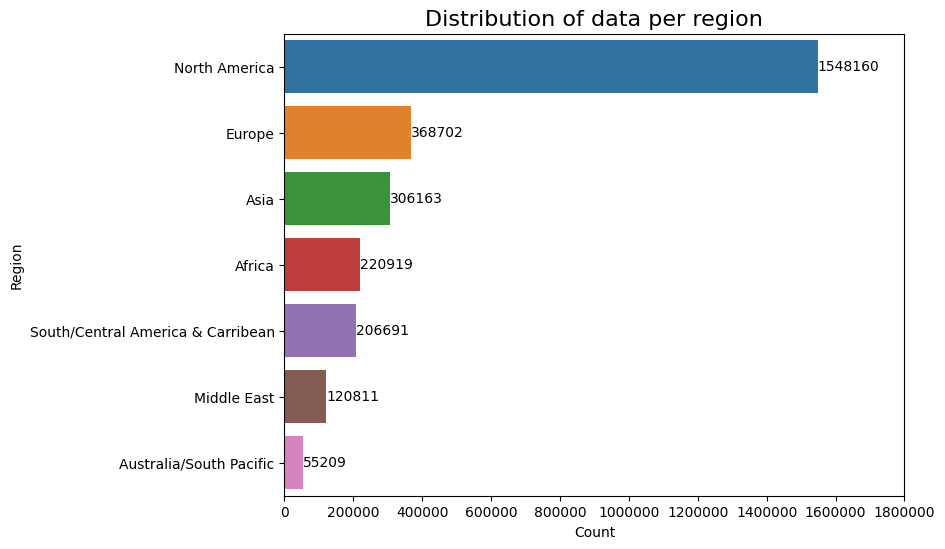

In [56]:
plt.figure(figsize= (8, 6))
plt.ticklabel_format(style='plain', axis= 'x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df, y= 'region', order= df.value_counts('region', ascending= False).index)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.title('Distribution of data per region', fontsize= 16)
plt.ylabel('Region')
plt.xlabel('Count')
plt.xlim([0, 1.8e6])
plt.show()

#  Average temperature per year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/

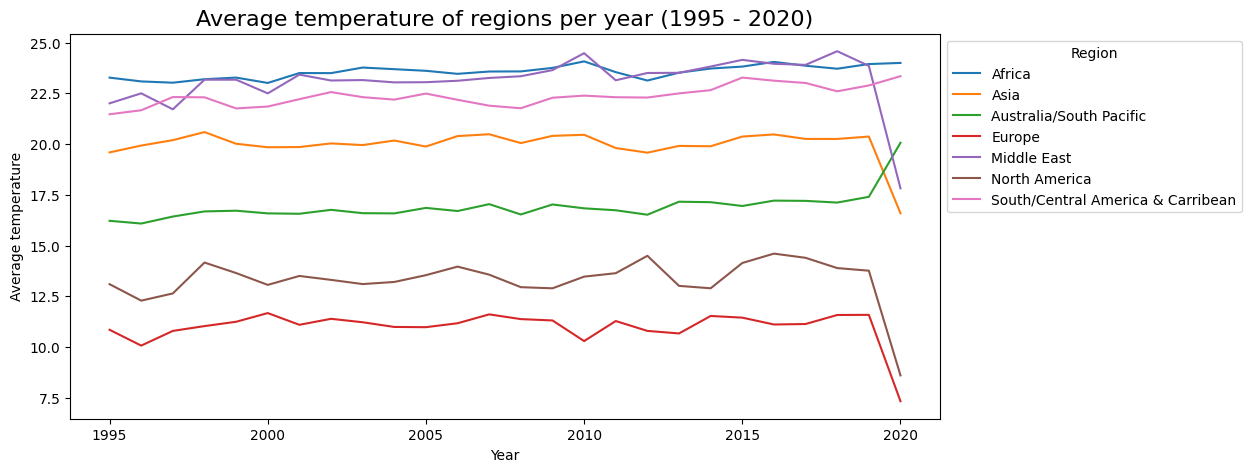

In [57]:
# Assuming df is your DataFrame with the relevant data
region_temperature_per_year = df.groupby(['region', 'year'])['avg_temperature'].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=region_temperature_per_year, x='year', y='avg_temperature', hue='region', ax=ax)
ax.set_title('Average temperature of regions per year (1995 - 2020)', fontsize=16)
ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.legend(title='Region', bbox_to_anchor=(1, 1))
plt.subplots_adjust(right=0.85)  # Adjust right to make space for the legend
plt.show()

# linear regression graph

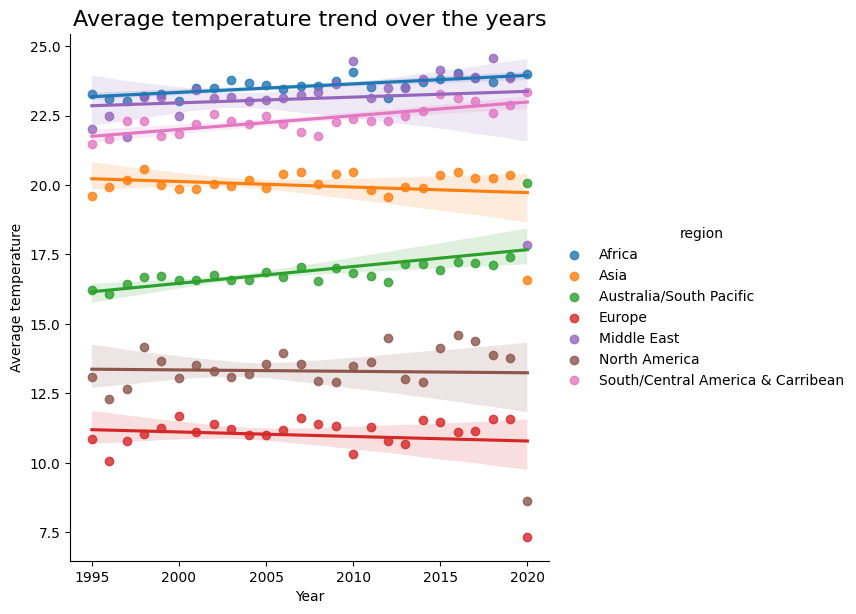

In [58]:
sns.lmplot(data= region_temperature_per_year, x= 'year', y= 'avg_temperature', hue= 'region', height= 6)
plt.title('Average temperature trend over the years', fontsize= 16)
plt.ylabel('Average temperature')
plt.xlabel('Year')
plt.show()

It is possible to notice that the annual temperature averages of the continents are in different levels with

* Africa and the Middle East with higher average temperatures, followed by
* Central/South America and the Caribbean
* Asia and Australia/South Pacific at an intermediate level
* And finally North America and Europe with lower averages.

It is also important to note that the linear regression graph shows an increase in average temperatures over the years for all regions.

# Tempreture per Column country

In [59]:
country_count = df.value_counts('country', ascending= True).tail(25)

In [60]:
top_25_countries = country_count.keys() # names of countries on the top 25 in number of records
df.query('country in @top_25_countries').groupby('country')['avg_temperature'].agg(['mean', 'median', 'std'])

,mean,median,std
country,,,
Australia,17.10,17.06,5.65
Austria,10.82,11.22,8.35
Belgium,10.84,10.89,6.34
Brazil,22.21,22.33,3.33
Canada,5.86,7.06,11.61
China,15.91,18.22,10.89
Denmark,8.56,8.39,6.67
Equador,20.76,23.72,5.91
France,12.99,12.83,6.46


## Histograms of average temperature by country

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

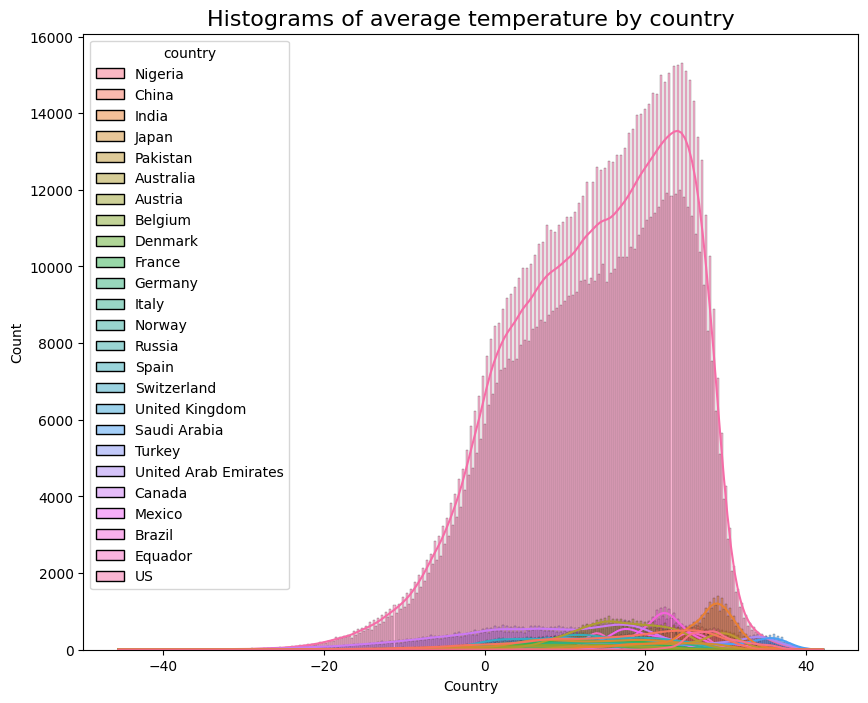

In [61]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df.query('country in @top_25_countries'), x= 'avg_temperature', hue= 'country', kde= True)
ax.set_title('Histograms of average temperature by country', fontsize= 16)
ax.set_xlabel('Country')
plt.show()

## Data distribution in country column

In [62]:
pd.DataFrame({'Count': country_count}).transpose()

country,Belgium,Denmark,Austria,Norway,Russia,Nigeria,Equador,Germany,Pakistan,Saudi Arabia,...,Mexico,Brazil,Switzerland,Japan,Spain,India,Australia,China,Canada,US
Count,9238,9238,9240,9584,12423,15101,15630,17541,18076,18418,...,23640,27496,27681,27710,27712,36903,46002,46139,73965,1450555


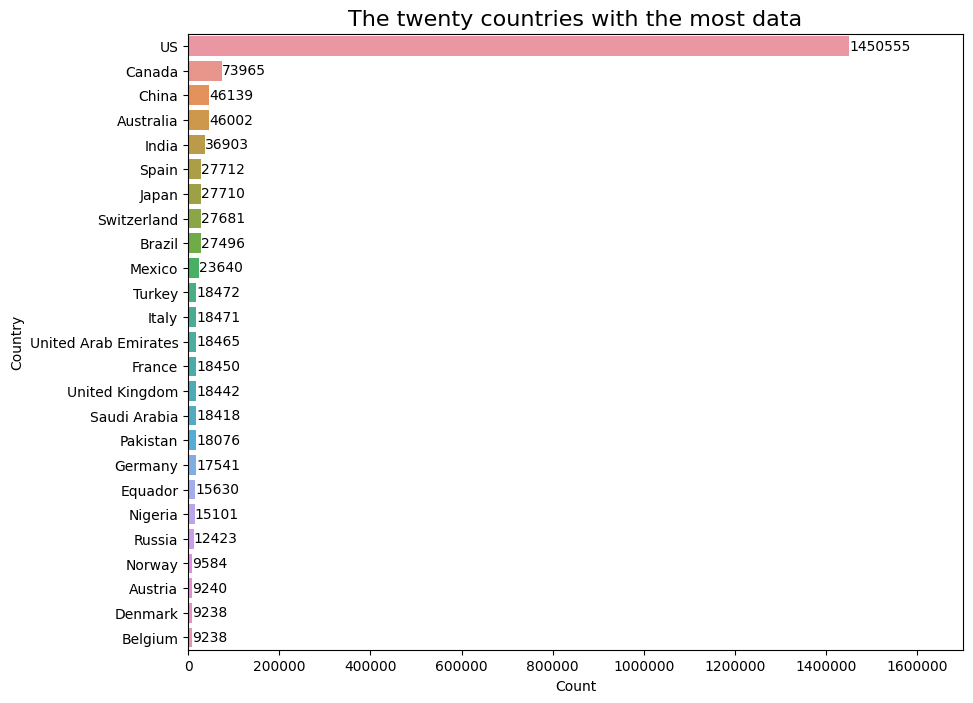

In [63]:
plt.figure(figsize= (10, 8))
plt.ticklabel_format(style='plain', axis='x') # avoid scientific notation in xaxis
ax = sns.countplot(data= df.query('country in @top_25_countries'), y= 'country', 
                   order= df.query('country in @top_25_countries').value_counts('country', ascending= False).index)
ax.set_title('The twenty countries with the most data', fontsize= 16)

for container in ax.containers:
  ax.bar_label(container, fmt= '%d', label_type= 'edge')

plt.xlim([0, 1.7e6])
ax.set_ylabel('Country')
ax.set_xlabel('Count')
plt.show()

# Visualization of the average temperature by country

In [64]:
map_df = df.query('year < 2024').groupby(['country', 'year'])[['avg_temperature']].mean().reset_index()

In [65]:
fig = px.choropleth(
    map_df, locations= 'country', locationmode= 'country names',
    animation_frame= 'year', color= 'avg_temperature',
    hover_name= 'country', color_continuous_scale= 'RdYlBu_r',
    title= 'Average temperature of countries between 1995 - 2019'
)
fig.update_layout(title= {'x': 0.5})
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [66]:
df_small = df[df['country'].isin(['Egypt', 'Algeria'])]
df_small.shape


(18458, 7)

In [67]:
df_small.head()

,region,country,city,month,day,year,avg_temperature
0,Africa,Algeria,Algiers,1,1,1995,17.89
1,Africa,Algeria,Algiers,1,2,1995,9.67
2,Africa,Algeria,Algiers,1,3,1995,9.33
3,Africa,Algeria,Algiers,1,4,1995,8.00
4,Africa,Algeria,Algiers,1,5,1995,8.83


In [70]:
df=pd.get_dummies(df_small,columns=['city','country','month','day','year'])

# Spliting data to Train, Test and Val

In [80]:
X=df.drop(columns=['region','avg_temperature'])
y=df['avg_temperature']
X=X.astype(int)

In [82]:
X

,city_Algiers,city_Cairo,country_Algeria,country_Egypt,month_1,month_2,month_3,month_4,month_5,month_6,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45771,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
45772,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
45773,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
45774,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split, cross_val_score

# Getting the length of the dataset
dataset_length = len(df_small)

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.8,test_size=0.2)

# Print information about the splits
print(f"Total dataset length: {len(X)}")
print(f"Training set length: {len(x_train)}")
print(f"Validation set length: {len(x_val)}")
print(f"Test set length: {len(x_test)}")

Total dataset length: 18458
Training set length: 11812
Validation set length: 2954
Test set length: 3692


In [84]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [85]:
# sc = MinMaxScaler(feature_range = (0, 1))
sc=StandardScaler()
training_set_scaled = sc.fit_transform(training_data)
val_set_scaled = sc.transform(val_data)
test_set_scaled = sc.transform(test_data)

# Using SVM

In [93]:
# Support Vector Machine Model setup after parameter tuning
model = svm.SVR()
model.fit(x_train, y_train)

SVR()

In [ ]:
model.predict()

In [99]:
predicted

array([19.76334914, 15.70244781, 11.65866917, ..., 29.1441252 ,
       11.9336683 , 20.74428918])

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume you have already trained your model and have test data X_test and y_test
# model = your trained model

# Predictions
y_pred = model.predict(x_test)

# R^2 score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mse ** 0.5

print(f"R^2: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R^2: 0.8714315604498047
Mean Absolute Error: 1.6778887969241993
Mean Squared Error: 5.181678983643782
Root Mean Squared Error: 2.2763301569947587


In [105]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# Assume you have your data: X_test, y_test, and y_pred
# Creating a DataFrame for easier plotting
df = pd.DataFrame({
    'True Values': y_test,
    'Predictions': y_pred,
    'Residuals': y_test - y_pred
})

# Scatter Plot of Predictions vs. True Values
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df['True Values'], y=df['Predictions'], mode='markers', name='Predictions vs True Values'))
fig1.update_layout(title='Predictions vs True Values', xaxis_title='True Values', yaxis_title='Predictions')
fig1.show()

# Residual Plot
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df['Predictions'], y=df['Residuals'], mode='markers', name='Residuals'))
fig2.update_layout(title='Residual Plot', xaxis_title='Predictions', yaxis_title='Residuals')
fig2.show()

# Histogram of Residuals
fig3 = px.histogram(df, x='Residuals', nbins=30, title='Histogram of Residuals')
fig3.update_layout(xaxis_title='Residuals', yaxis_title='Count')
fig3.show()

# Regression Line (for simple linear regression)
# Assuming X_test is a 1D array
if X_test.shape[1] == 1:  # Checking if it's a simple regression
    fig4 = go.Figure()
    fig4.add_trace(go.Scatter(x=df['True Values'], y=df['Predictions'], mode='markers', name='Predictions vs True Values'))
    fig4.add_trace(go.Scatter(x=x_test.flatten(), y=model.predict(x_test).flatten(), mode='lines', name='Regression Line', line=dict(color='red')))
    fig4.update_layout(title='Regression Line', xaxis_title='True Values', yaxis_title='Predictions')
    fig4.show()
